# 3 statistical experiment and significance testing

when to use different statistical test?<br>

- apple claims that their average user's age is 45. we sample the user's age and want to find if their claim is correct<br>

    - 1-sample z-test **for mean**<br>
        this sucks
    - 1-sample t-test **for mean**<br>
<br>

- we want to know if the proportion of christian in thr USA is 50% male, 50% female
    - 1-sample z-test **for proportion**<br>
        this sucks
    - 1-sample t-test **for proportion**<br>
<br>

- we want to check if the mean age of men is more than mean age of female
    - 2-sample independent test **for mean**<br>
<br>

- we want to check if the drug A cure more people than drug B<br>
    - 2-sample independent test **for proportion**<br>
<br>

- we want to know if our lecture improve class A knowledge with pre-test ans post-test<br>
    - matched/paired sample test<br>
<br>

- we want to know gender is associated with political preference<br>
    - chi-square test **for independence**<br>
<br>
        |        | repuplican  | democrat  | independent |   
        |--------|------|------|-------------|
        | male   | 2351 | 1234 | 123         |   
        | female | 1344 | 3109 | 144         |      
<br>

- Your independent variable is social media use, and you assign groups to low, medium, and high levels of social media use to find out if there is a difference in hours of sleep per night<br>
    - one-way anova<br>

## ab testing

- Treatment<br>
Something (drug, price, web headline) to which a subject is exposed.<br>
- Treatment group<br>
A group of subjects exposed to a specific treatment.<br>
- Control group<br>
A group of subjects exposed to no (or standard) treatment.<br>
- Randomization<br>
The process of randomly assigning subjects to treatments.<br>
- Subjects<br>
The items (web visitors, patients, etc.) that are exposed to treatments.<br>
- Test statistic<br>
The metric used to measure the effect of the treatment.<br>

## hypothesis test

- Null hypothesis<br>
The hypothesis that chance is to blame.<br>
- Alternative hypothesis<br>
Counterpoint to the null (what you hope to prove).<br>
- One-way test<br>
Hypothesis test that counts chance results only in one direction.<br>
- Two-way test<br>
Hypothesis test that counts chance results in two directions.

## resampling
repeatedly sample values from observed data, with a
general goal of assessing random variability in a statistic<br>
1. bootstrap: to assess the reliability of an estimate<br>
2. premutation test: test hypotheses

### permutation test

- Permutation test<br>
The procedure of combining two or more samples together and randomly (or
exhaustively) reallocating the observations to resamples.<br>
Synonyms: Randomization test, random permutation test, exact test<br>
- Resampling<br>
Drawing additional samples (“resamples”) from an observed data set.<br>
- With or without replacement<br>
In sampling, whether or not an item is returned to the sample before the next
draw<br>

1. Combine the results from the different groups into a single data set.<br>
2. Shuffle the combined data and then randomly draw (without replacement) a
resample of the same size as group A (clearly it will contain some data from the
other groups).<br>
3. From the remaining data, randomly draw (without replacement) a resample of
the same size as group B.<br>
4. Do the same for groups C, D, and so on. You have now collected one set of
resamples that mirror the sizes of the original samples.<br>
5. Whatever statistic or estimate was calculated for the original samples (e.g., differ‐
ence in group proportions), calculate it now for the resamples, and record; this
constitutes one permutation iteration.<br>
6. Repeat the previous steps R times to yield a permutation distribution of the test
statistic.<br>

In [ ]:
path= data_dir / 'web_page_data.csv'
session_times= pd.read_csv(path)
session_times['Time']= session_times['Time'] * 100
print(len(session_times)) 
session_times.head()

36


,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


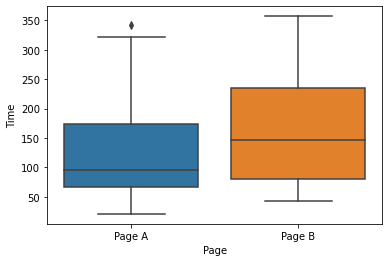

In [ ]:
sns.boxplot(data= session_times, y= 'Time', x= 'Page')
plt.show()

In [ ]:
time_a= session_times.loc[(session_times['Page'] == 'Page A'), 'Time'].mean()
time_b= session_times.loc[(session_times['Page'] == 'Page B'), 'Time'].mean()

print(f'mean time a: {time_a}')
print(f'mean time b: {time_b}')
print(f'difference: {time_b - time_a}')

mean time a: 126.33333333333333
mean time b: 162.0
difference: 35.66666666666667


In [ ]:
session_times['Page'].value_counts()

Page A    21
Page B    15
Name: Page, dtype: int64

In [ ]:
def perm_fun(df, nA, nB):
    idx_A= sorted(df.sample(n= nA, replace= False).index)
    idx_B= df.index[~(df.index.isin(idx_A))]
    print(idx_A)
    print(idx_B)

perm_fun(session_times, 21, 15)

[0, 1, 2, 5, 6, 7, 8, 12, 13, 15, 16, 17, 20, 22, 23, 24, 26, 29, 30, 32, 35]
Int64Index([3, 4, 9, 10, 11, 14, 18, 19, 21, 25, 27, 28, 31, 33, 34], dtype='int64')


In [ ]:
def perm_fun(df, nA, nB):
    idx_A= sorted(df.sample(n= nA, replace= False).index)
    idx_B= df.index[~(df.index.isin(idx_A))]
    mean= df.iloc[idx_B].mean() - df.iloc[idx_A].mean()
    # mean = b-a because b is bigger in original sample
    return mean

perm_fun(session_times, 21, 15)

C:\Users\Anjelito\AppData\Local\Temp\ipykernel_17508\3594120095.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean= df.iloc[idx_B].mean() - df.iloc[idx_A].mean()


Time   -22.847619
dtype: float64

C:\Users\Anjelito\AppData\Local\Temp\ipykernel_17508\3594120095.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean= df.iloc[idx_B].mean() - df.iloc[idx_A].mean()


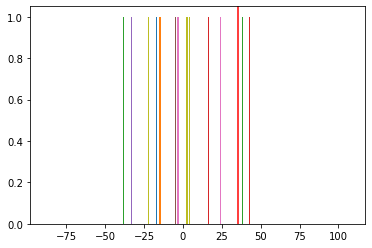

In [ ]:
perm_diffs= [
    perm_fun(session_times, 21, 15) for _ in range(1000)
]

plt.hist(perm_diffs, bins= 10)

plt.axvline(x= (time_b - time_a), color= 'red')
plt.show()

In [ ]:
# area of curve to the right of line
np.mean(perm_diffs > (time_b - time_a))

0.136

## statistical significance and p values

- p-value<br>
Given a chance model that embodies the null hypothesis, the p-value is the prob‐
ability of obtaining results as unusual or extreme as the observed results.<br>
- Alpha<br>
The probability threshold of “unusualness” that chance results must surpass for
actual outcomes to be deemed statistically significant.<br>
- Type 1 error<br>
Mistakenly concluding an effect is real (when it is due to chance).<br>
- Type 2 error<br>
Mistakenly concluding an effect is due to chance (when it is real).

In [ ]:
ab_testing= pd.DataFrame({
    'outcome': ['conv', 'no conv'],
    'price a': [200, 23539],
    'price b': [182, 22406]
})
ab_testing

,outcome,price a,price b
0,conv,200,182
1,no conv,23539,22406


In [ ]:
conv_a, conv_b= (ab_testing.iloc[0, 1:] / ab_testing.sum(axis= 0)[1:]).values
conv_a, conv_b= conv_a * 100, conv_b * 100
print(f'diff: {conv_a - conv_b}')
conv_a, conv_b

diff: 0.03675791182059274


(0.8424954715868402, 0.8057375597662475)

In [ ]:
# If the two prices share the same conversion rate, could chance varia‐
# tion produce a difference as big as 5%?

# 1. Put cards labeled 1 and 0 in a box: this represents the supposed shared conver‐
# sion rate of 382 ones and 45,945 zeros = 0.008246 = 0.8246%.
# 2. Shuffle and draw out a resample of size 23,739 (same n as price A), and record
# how many 1s.
# 3. Record the number of 1s in the remaining 22,588 (same n as price B).
# 4. Record the difference in proportion of 1s.
# 5. Repeat steps 2–4.
# 6. How often was the difference >= 0.0368?

In [ ]:
ab_testing[['price a', 'price b']].sum(axis= 1)

0      382
1    45945
dtype: int64

In [ ]:
ab_testing[['price a', 'price b']].sum(axis= 0)

price a    23739
price b    22588
dtype: int64

In [ ]:
obs_perc_diff= conv_a - conv_b
print(f'observed pct diff: {obs_perc_diff}')

conversion= [1] * 382 # simulate conversion
conversion.extend([0] * 45945) # simulate no conversion
conversion= pd.Series(conversion) # convert to series so that it has index

100 * perm_fun(conversion, 23739, 22588) # resample to price a and price b

observed pct diff: 0.03675791182059274


0.05827776305859962

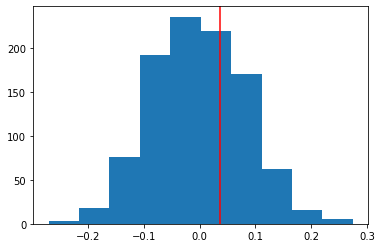

p-value:
0.317


In [ ]:
perm_diffs= [100 * perm_fun(conversion, 23739, 22588) for i in range(1000)]

plt.hist(perm_diffs, bins= 10)

plt.axvline(x= obs_perc_diff, color= 'red')
plt.show()

print('p-value:')
print(
    np.mean([
        diff > obs_perc_diff for diff in perm_diffs
    ])
)

In [ ]:
ab_testing

,outcome,price a,price b
0,conv,200,182
1,no conv,23539,22406


In [ ]:
# use binomial dist to approximate p-value

survivors= np.array([[200, 23539], [182, 22406]])
chi2, p, dof, ex= stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p / 2:.4f}')

p-value for single sided test: 0.3498


## alpha

> The probability that, given a chance model, results as extreme as the observed results
could occur.

## t-test

In [ ]:
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [ ]:
time_a= session_times.loc[(session_times['Page'] == 'Page A'), 'Time']
time_b= session_times.loc[(session_times['Page'] == 'Page B'), 'Time']

res= stats.ttest_ind(time_a, time_b, equal_var= False)
res

Ttest_indResult(statistic=-1.098315562363811, pvalue=0.2815243724570064)

In [ ]:
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


## anova

- Pairwise comparison<br>
A hypothesis test (e.g., of means) between two groups among multiple groups.<br>
- Omnibus test<br>
A single hypothesis test of the overall variance among multiple group means.<br>
- Decomposition of variance<br>
Separation of components contributing to an individual value (e.g., from the
overall average, from a treatment mean, and from a residual error).<br>
- F-statistic<br>
A standardized statistic that measures the extent to which differences among
group means exceed what might be expected in a chance model.<br>
- SS<br>
“Sum of squares,” referring to deviations from some average value.

1. Combine all the data together in a single box.
2. Shuffle and draw out four resamples of five values each.
3. Record the mean of each of the four groups.
4. Record the variance among the four group means.
5. Repeat steps 2–4 many (say, 1,000) times.

In [ ]:
data= {
    'Page 1': [164, 172, 177, 156, 195],
    'Page 2': [178, 191, 182, 185, 177],
    'Page 3': [175, 193, 171, 163, 176],
    'Page 4': [155, 166, 164, 170, 168], 
}

web= pd.DataFrame(data)
web

,Page 1,Page 2,Page 3,Page 4
0,164,178,175,155
1,172,191,193,166
2,177,182,171,164
3,156,185,163,170
4,195,177,176,168


In [ ]:
web= web.melt()
web.columns = ['page', 'time']
web.head()

,page,time
0,Page 1,164
1,Page 1,172
2,Page 1,177
3,Page 1,156
4,Page 1,195


In [ ]:
observed_variance = web.groupby('page').mean().var()[0]
print('Observed means:', web.groupby('page').mean().values.ravel())
print('Variance:', observed_variance)

times= web['time']

def perm_test(df):
    df= df.copy()
    df['time']= np.random.permutation(times)
    mean= df.groupby('page').mean()
    var= np.var(mean, ddof= 1)
    return var

variances= [perm_test(web) for i in range(1000)]
pr_prob= np.sum(variances > observed_variance) / 1000

print(f'pr(prob) is {pr_prob}')

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
pr(prob) is 0.067


## f statistics

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd

four_sessions= pd.read_csv(r'practical-statistics-for-data-scientists\data\four_sessions.csv')

model = smf.ols('Time ~ Page', data=four_sessions).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


## chi-square

- Chi-square statistic<br>
A measure of the extent to which some observed data departs from expectation.<br>
- Expectation or expected<br>
How we would expect the data to turn out under some assumption, typically the
null hypothesis.

In [ ]:
# Suppose you are testing three different headlines—A, B, and C—and you run them
# each on 1,000 visitors, with the results shown in Table 3-4

dict= {
    'click': [14, 8, 12],
    'no_click': [986, 992, 988],
}

df_headline_or= pd.DataFrame(dict).transpose()
df_headline_or.columns= ['a', 'b', 'c']
df_headline_or

,a,b,c
click,14,8,12
no_click,986,992,988


In [ ]:
# A resampling procedure can test whether
# the click rates differ to an extent greater than chance might cause. For this test, we
# need to have the “expected” distribution of clicks, and in this case, that would be
# under the null hypothesis assumption that all three headlines share the same click
# rate, for an overall click rate of 34/3,000. Under this assumption, our contingency
# table would look like Table 3-5

# Expected if all three headlines have the same click rate (null hypothesis)

df_headline_null= df_headline_or.copy()
mean= df_headline_null.mean(axis= 1)

for col in df_headline_null.columns:
    df_headline_null[col]= mean

df_headline_null

,a,b,c
click,11.333333,11.333333,11.333333
no_click,988.666667,988.666667,988.666667


$ R= \frac{Observed - Expected}{\sqrt{Expected}}$

In [ ]:
df_pearson_res= (df_headline_or - df_headline_null) / np.sqrt(df_headline_null)
df_pearson_res

,a,b,c
click,0.792118,-0.990148,0.198030
no_click,-0.084809,0.106012,-0.021202


The chi-square statistic is defined as the sum of the squared Pearson residuals:

$ X= \sum_{i}^{r}\sum_{j}^{c}R^2 $

where r and c are the number of rows and columns, respectively.

In [ ]:
x= np.square(df_pearson_res).sum().sum()
print(f'X= {x}')

X= 1.6659394708658917


 Is that more than could reasonably occur in a chance
model?

We can test with this resampling algorithm:
1. Constitute a box with 34 ones (clicks) and 2,966 zeros (no clicks).
2. Shuffle, take three separate samples of 1,000, and count the clicks in each.
3. Find the squared differences between the shuffled counts and the expected
counts and sum them.
4. Repeat steps 2 and 3, say, 1,000 times.
5. How often does the resampled sum of squared deviations exceed the observed?
That’s the p-value

In [ ]:
import random

box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(df_headline_or.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
    sum(random.sample(box, 1000)),
    sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]
resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)

print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4890


The distribution of the chi-square statistic can be approximated by a chi-square distribution. The appropriate standard chi-square distribution is determined by the
degrees of freedom. For a contingency table,
the degrees of freedom are related to the number of rows (r) and columns (c) as
follows:
- degrees of freedom = (r − 1) × (c − 1)

In [ ]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_headline_or)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


The chi-square distribution is a good approximation of the shuffled resampling test
just described, except when counts are extremely low (single digits, especially five or
fewer).

## multi-arm bandit
An imaginary slot machine with multiple arms for the customer to choose from, each with different payoffs, here taken to be an analogy for a multitreatment experiment.

- Arm

A treatment in an experiment (e.g., “headline A in a web test”).

- Win

The experimental analog of a win at the slot machine (e.g., “customer clicks on the link”)

Suppose further that you initially try each
arm 50 times and get the following results:
- Arm A: 10 wins out of 50
- Arm B: 2 win out of 50
- Arm C: 4 wins out of 50

One extreme approach is to say, “Looks like arm A is a winner—let’s quit trying the
other arms and stick with A.” This takes full advantage of the information from the
initial trial. If A is truly superior, we get the benefit of that early on. On the other
hand, if B or C is truly better, we lose any opportunity to discover that. Another
extreme approach is to say, “This all looks to be within the realm of chance—let’s
keep pulling them all equally.” This gives maximum opportunity for alternates to A to
show themselves. However, in the process, we are deploying what seem to be inferior
treatments. How long do we permit that? Bandit algorithms take a hybrid approach:
we start pulling A more often, to take advantage of its apparent superiority, but we
don’t abandon B and C. We just pull them less often. If A continues to outperform,
we continue to shift resources (pulls) away from B and C and pull A more often. If,
on the other hand, C starts to do better, and A starts to do worse, we can shift pulls
from A back to C. If one of them turns out to be superior to A and this was hidden in
the initial trial due to chance, it now has an opportunity to emerge with further
testing.

Bandit algorithms can efficiently handle 3+ treatments and move toward optimal
selection of the “best.” For traditional statistical testing procedures, the complexity of
decision making for 3+ treatments far outstrips that of the traditional A/B test, and
the advantage of bandit algorithms is much greater.

## power and sample size

- Effect size

The minimum size of the effect that you hope to be able to detect in a statistical
test, such as “a 20% improvement in click rates.”

- Power

The probability of detecting a given effect size with a given sample size.

*For example, we might say (hypothetically) that the
probability of distinguishing between a .330 hitter and a .200 hitter in 25 at-bats is
0.75. The effect size here is a difference of .130. And “detecting” means that a hypoth‐
esis test will reject the null hypothesis of “no difference” and conclude there is a real
effect. So the experiment of 25 at-bats (n = 25) for two hitters, with an effect size of
0.130, has (hypothetical) power of 0.75, or 75%.*

- Significance level

The statistical significance level at which the test will be conducted

**the bigger the actual difference
between treatments A and B, the greater the probability that our experiment will
reveal it; and the smaller the difference, the more data will be needed to detect it**

In summary, for calculating power or required sample size, there are four moving
parts:<br>
    • Sample size<br>
    • Effect size you want to detect<br>
    • Significance level (alpha) at which the test will be conducted<br>
    • Power<br>

### Sample size

Suppose you are looking at click-through rates (clicks as a percentage of
exposures), and testing a new ad against an existing ad. How many clicks do you need
to accumulate in the study?

For example, suppose current click-through rates are about 1.1%, and you are seeking
a 10% boost to 1.21%. So we have two boxes: box A with 1.1% ones (say, 110 ones and
9,890 zeros), and box B with 1.21% ones (say, 121 ones and 9,879 zeros)

In [ ]:
import statsmodels.api as sm

effect_size = sm.stats.proportion_effectsize(0.0121, 0.0110) 
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
print('Sample Size per group: %.3f' % result)

Sample Size per group: 116602.393


In [ ]:
effect_size = sm.stats.proportion_effectsize(0.0110 * 1.5, 0.0110) 
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
print('Sample Size per group: %.3f' % result)

Sample Size per group: 5488.408


- Finding out how big a sample size you need requires thinking ahead to the statistical test you plan to conduct.
- You must specify the minimum size of the effect that you want to detect.
- You must also specify the required probability of detecting that effect size (power).
- Finally, you must specify the significance level (alpha) at which the test will be conducted.

# 4 regression and prediction

## simple linear regression

$ Y = b_{0} + b_{1}X $

$b_{0}$ = intercept <br>
$b_{1}$ = slope

- Response<br>
The variable we are trying to predict.<br>
_Synonyms_: 
dependent variable, Y variable, target, outcome<br>
- Independent variable<br>
The variable used to predict the response.<br>
_Synonyms_: 
X variable, feature, attribute, predictor<br>
- Record<br>
The vector of predictor and outcome values for a specific individual or case.<br>
_Synonyms_: 
row, case, instance, example<br>
- Intercept<br>
The intercept of the regression line—that is, the predicted value when X = 0.<br>
_Synonyms_: 
b0, β0<br>
- Regression coefficient<br>
The slope of the regression line.<br>
_Synonyms_: 
slope, b1, β1, parameter estimates, weights<br>
- Fitted values<br>
The estimates Yi obtained from the regression line.<br>
_Synonyms_: 
predicted values<br>
- Residuals<br>
The difference between the observed values and the fitted values.<br>
_Synonyms_: 
error<br>
- Least squares<br>
The method of fitting a regression by minimizing the sum of squared residuals.<br>
_Synonyms_:
ordinary least squares, OLS<br>

## multiple linear regression

$ Y = b_{0} + b_{1}X_{1} + b_{2}X_{2} + ... + b_{p}X_{p} $

- Root mean squared error<br>
The square root of the average squared error of the regression (this is the most
widely used metric to compare regression models).<br>
Synonym:
RMSE<br>
- Residual standard error<br>
The same as the root mean squared error, but adjusted for degrees of freedom.<br>
Synonym:
RSE<br>
- R-squared<br>
The proportion of variance explained by the model, from 0 to 1.<br>
Synonyms:
coefficient of determination, R2<br>
- t-statistic<br>
The coefficient for a predictor, divided by the standard error of the coefficient,
giving a metric to compare the importance of variables in the model. See “t-Tests”
on page 110.<br>
- Weighted regression<br>
Regression with the records having different weights.<br>

In [ ]:
house= pd.read_csv('practical-statistics-for-data-scientists\data\house_sales.csv', sep= '\t')

from sklearn.linear_model import LinearRegression
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
 print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.8306036024076
 SqFtLot: -0.06046682065306541
 Bathrooms: -19442.840398321052
 Bedrooms: -47769.95518521427
 BldgGrade: 106106.96307898087


In [ ]:
import statsmodels.api as sm
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:45:47   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# rmse
from sklearn.metrics import r2_score, mean_squared_error

y_pred= house_lm.predict(house[predictors])
print(f'r^2 score: {r2_score(house[outcome], y_pred)}')
print(f'rmse: {np.sqrt(mean_squared_error(house[outcome], y_pred))}')

r^2 score: 0.5405875253381902
rmse: 261220.19743696266


## categorical vars

- Dummy variables<br>
Binary 0–1 variables derived by recoding factor data for use in regression and
other models.<br>
- Reference coding<br>
The most common type of coding used by statisticians, in which one level of a
factor is used as a reference and other factors are compared to that level.<br>
Synonym: treatment coding
- One hot encoder<br>
A common type of coding used in the machine learning community in which all
factor levels are retained. While useful for certain machine learning algorithms,
this approach is not appropriate for multiple linear regression.<br>
- Deviation coding<br>
A type of coding that compares each level against the overall mean as opposed to
the reference level.<br>
Synonym: sum contrast

In [ ]:
# one hot encoding

pd.get_dummies(house['PropertyType'], drop_first= True).head()
# use drop first to avoid multicolinearoty

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


### categorical var with many levels

In [ ]:
house.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

house = pd.read_csv('practical-statistics-for-data-scientists\data\house_sales.csv', sep='\t')

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    }) # residual of each rows
    .groupby(['ZipCode']) # group by zipcode
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()
print(zip_groups.ZipGroup.value_counts().sort_index())

0    16
1    16
2    16
3    16
4    16
Name: ZipGroup, dtype: int64


In [ ]:
pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    }).head()

,ZipCode,residual
1,98002,-123750.814194
2,98166,-59145.413089
3,98166,190108.725716
4,98168,-198788.774412
5,98168,-91774.996129


In [ ]:
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    }) # residual of each rows
    .groupby(['ZipCode']) # group by zipcode
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0], # get first zipcode
        'count': len(x), # count number of rows per zipcode
        'median_residual': x.residual.median() # get median residual
    })
]).sort_values('median_residual') # sort ascending by median res
zip_groups.head()

,ZipCode,count,median_residual
36,98057,4,-537321.644462
27,98043,1,-307661.343614
46,98092,289,-193569.183599
23,98038,788,-150066.477035
31,98051,32,-142352.869593


In [ ]:
zip_groups['cum_count'] = np.cumsum(zip_groups['count']) # cumsum count
print(zip_groups['cum_count'].max())
print(len(house))
zip_groups.head()

22687
22687


,ZipCode,count,median_residual,cum_count
36,98057,4,-537321.644462,4
27,98043,1,-307661.343614,5
46,98092,289,-193569.183599,294
23,98038,788,-150066.477035,1082
31,98051,32,-142352.869593,1114


In [ ]:
# cut data into 5 based on cumulative count
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()

,ZipCode,count,median_residual,cum_count,ZipGroup
36,98057,4,-537321.644462,4,0
27,98043,1,-307661.343614,5,0
46,98092,289,-193569.183599,294,0
23,98038,788,-150066.477035,1082,0
31,98051,32,-142352.869593,1114,0


## stepwise regression

In [ ]:
from dmba import AIC_score, stepwise_selection

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']] # if trure convert to 1

y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.27755304201446
 BldgGrade: 137159.56022619864
 YrBuilt: -3565.424939249452
 Bedrooms: -51947.38367361421
 Bathrooms: 42396.16452772033
 PropertyType_Townhouse: 84479.16203299884
 SqFtFinBasement: 7.046974967553979
 PropertyType_Single Family: 22912.05518701766


## interpreting regression equation

- Correlated variables<br>
When the predictor variables are highly correlated, it is difficult to interpret the
individual coefficients.<br>

- Multicollinearity<br>
When the predictor variables have perfect, or near-perfect, correlation, the
regression can be unstable or impossible to compute.<br>
Synonym: collinearity<br>
Causes:
    1. A variable is included multiple times by error.<br>
    2. P dummies, instead of P – 1 dummies, are created from a factor variable<br>
    3. Two variables are nearly perfectly correlated with one another<br><br>

    > Multicollinearity is not such a problem for nonlinear regression methods like trees, clustering, and nearest-neighbors

- Confounding variables<br>
An important predictor that, when omitted, leads to spurious relationships in a
regression equation.<br>

- Main effects<br>
The relationship between a predictor and the outcome variable, independent of
other variables.<br>

- Interactions<br>
An interdependent relationship between two or more predictors and the
response.<br>

    > Model Selection with Interaction Terms<br>
In problems involving many variables, several different approaches are commonly taken:<br>
1. In some problems, prior knowledge and intuition can guide
the choice of which interaction terms to include in the model.<br>
2. Stepwise selection (see “Model Selection and Stepwise Regres‐
sion” on page 156) can be used to sift through the various
models.<br>
3. Penalized regression can automatically fit to a large set of pos‐
sible interaction terms.<br>
4. Use tree models, as
well as their descendants, random forest and gradient boosted
trees. This class of models automatically searches for optimal
interaction terms<br>

## regression diagnostics

- Standardized residuals<br>
Residuals divided by the standard error of the residuals.<br>
- Outliers<br>
Records (or outcome values) that are distant from the rest of the data (or the pre‐
dicted outcome).<br>
- Influential value<br>
A value or record whose presence or absence makes a big difference in the
regression equation.<br>
- Leverage<br>
The degree of influence that a single record has on a regression equation.
Synonym: hat-value<br>
- Non-normal residuals<br>
Non-normally distributed residuals can invalidate some technical requirements
of regression but are usually not a concern in data science.<br>
- Heteroskedasticity<br>
When some ranges of the outcome experience residuals with higher variance
(may indicate a predictor missing from the equation).<br>
- Partial residual plots<br>
A diagnostic plot to illuminate the relationship between the outcome variable
and a single predictor.<br>
Synonym: added variables plot<br>

In [ ]:
# outliers

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

house_98105 = house.loc[house['ZipCode'] == 98105, ]
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))

result_98105 = house_outlier.fit()

influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal
sresiduals.idxmin(), sresiduals.min()

(24333, -4.326731804078567)

In [ ]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


In [ ]:
# influential onservations

# For purposes of fitting a regression that reliably predicts future data, identifying
# influential observations is useful only in smaller data sets. For regressions involving
# many records, it is unlikely that any one observation will carry sufficient weight to
# cause extreme influence on the fitted equation (although the regression may still have
# big outliers). For purposes of anomaly detection, though, identifying influential
# observations can be very useful.

c:\Users\Anjelito\miniconda3\envs\data_science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'abs(residual)')

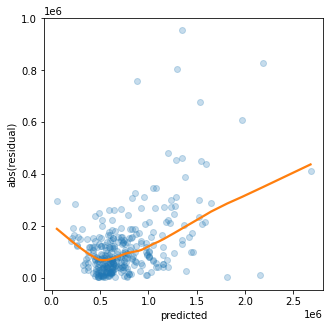

In [ ]:
# heteroskedacity

fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(
    result_98105.fittedvalues, 
    np.abs(result_98105.resid),
    scatter_kws={'alpha': 0.25}, line_kws={'color': 'C1'},
    lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

# Heteroskedasticity indicates that prediction errors differ for differ‐
# ent ranges of the predicted value, and may suggest an incomplete
# model. For example, the heteroskedasticity in lm_98105 may indi‐
# cate that the regression has left something unaccounted for in high-and low-range homes.


## polynomial regression

- Polynomial regression<br>
Adds polynomial terms (squares, cubes, etc.) to a regression.<br>
- Spline regression<br>
Fitting a smooth curve with a series of polynomial segments.<br>
- Knots<br>
Values that separate spline segments.<br>
- Generalized additive models<br>
Spline models with automated selection of knots.<br>
Synonym: GAM

## spline regression

In [ ]:
import statsmodels.formula.api as smf

formula = 'AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' +\
    'SqFtLot + Bathrooms + Bedrooms + BldgGrade'
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()

# 5. classification

- Accuracy<br>
The percent (or proportion) of cases classified correctly.<br>
- Confusion matrix<br>
A tabular display (2×2 in the binary case) of the record counts by their predicted
and actual classification status.<br>
- Sensitivity<br>
The percent (or proportion) of all 1s that are correctly classified as 1s.<br>
Synonym: Recall
- Specificity<br>
The percent (or proportion) of all 0s that are correctly classified as 0s.<br>
- Precision<br>
The percent (proportion) of predicted 1s that are actually 1s.<br>
- ROC curve<br>
A plot of sensitivity versus specificity.<br>
- Lift<br>
A measure of how effective the model is at identifying (comparatively rare) 1s at
different probability cutoffs.<br>